In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\Kartikay Raheja\Desktop\PY files\ckd.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wbcc     294 non-null float64
rbcc     269 non-null float64
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(14), object(11)
memory usage: 78.2+ KB


In [6]:
null_data=df.isnull().mean()
b_column=null_data[null_data>0.1]

In [7]:
df1=df.drop(columns=b_column.index,axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
age      391 non-null float64
bp       388 non-null float64
pcc      396 non-null object
ba       396 non-null object
bu       381 non-null float64
sc       383 non-null float64
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(4), object(9)
memory usage: 40.7+ KB


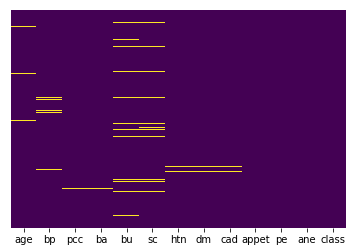

In [8]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df_numerical_ckd=df1[df1['class']=='ckd'].select_dtypes(include='float64')
df_numerical_nckd=df1[df1['class']=='notckd'].select_dtypes(include='float64')

In [10]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

In [11]:
imputer=Imputer()

In [12]:
df_numerical_ckd=imputer.fit_transform(df_numerical_ckd)
df_numerical_nckd=imputer.fit_transform(df_numerical_nckd)

In [13]:
df_numerical_ckd=pd.DataFrame(df_numerical_ckd,columns=df1.select_dtypes(include='float64').columns)
df_numerical_nckd=pd.DataFrame(df_numerical_nckd,columns=df1.select_dtypes(include='float64').columns)

In [14]:
df_numerical=pd.concat([df_numerical_ckd,df_numerical_nckd])

In [16]:
df_numerical.reset_index(inplace=True,drop=True)

In [20]:
df_categorical=df1.select_dtypes(include='object')
df_categorical.isnull().sum()

pcc      4
ba       4
htn      2
dm       2
cad      2
appet    1
pe       1
ane      1
class    0
dtype: int64

In [23]:
df_categorical[df_categorical.isnull().any(axis=1)]

,pcc,ba,htn,dm,cad,appet,pe,ane,class
288,notpresent,notpresent,NaN,NaN,NaN,good,no,no,notckd
290,NaN,NaN,no,no,no,good,no,no,notckd
294,notpresent,notpresent,no,no,no,NaN,NaN,NaN,notckd
297,notpresent,notpresent,NaN,NaN,NaN,good,no,no,notckd
300,NaN,NaN,no,no,no,good,no,no,notckd
316,NaN,NaN,no,no,no,good,no,no,notckd
328,NaN,NaN,no,no,no,good,no,no,notckd


In [37]:
df1_clean=df_categorical.join(df_numerical,how='outer')

In [40]:
df1_clean.dropna(inplace=True)

In [41]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 399
Data columns (total 13 columns):
pcc      393 non-null object
ba       393 non-null object
htn      393 non-null object
dm       393 non-null object
cad      393 non-null object
appet    393 non-null object
pe       393 non-null object
ane      393 non-null object
class    393 non-null object
age      393 non-null float64
bp       393 non-null float64
bu       393 non-null float64
sc       393 non-null float64
dtypes: float64(4), object(9)
memory usage: 43.0+ KB


In [42]:
l_encoder=LabelEncoder()
df1_clean['pcc']=l_encoder.fit_transform(df1_clean['pcc'])

In [45]:
df1_clean['ba']=l_encoder.fit_transform(df1_clean['ba'])
df1_clean['htn']=l_encoder.fit_transform(df1_clean['htn'])
df1_clean['dm']=l_encoder.fit_transform(df1_clean['dm'])
df1_clean['cad']=l_encoder.fit_transform(df1_clean['cad'])
df1_clean['appet']=l_encoder.fit_transform(df1_clean['appet'])
df1_clean['pe']=l_encoder.fit_transform(df1_clean['pe'])
df1_clean['ane']=l_encoder.fit_transform(df1_clean['ane'])
df1_clean['class']=l_encoder.fit_transform(df1_clean['class'])

In [81]:
df1_clean.corrwith(df1_clean['class'])

pcc     -0.261619
ba      -0.184171
htn     -0.584641
dm      -0.553272
cad     -0.232750
appet   -0.388351
pe      -0.370318
ane     -0.321034
class    1.000000
age     -0.231089
bp      -0.285354
bu      -0.383552
sc      -0.300855
dtype: float64

In [58]:
x=df1_clean.drop(labels='class',axis=1)
y=df1_clean['class']
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
lr=LogisticRegression()

In [117]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
pred=lr.predict(x_test)

In [119]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      0.91      0.95        92
          1       0.85      1.00      0.92        46

avg / total       0.95      0.94      0.94       138



In [121]:
print(confusion_matrix(y_test,pred))

[[84  8]
 [ 0 46]]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


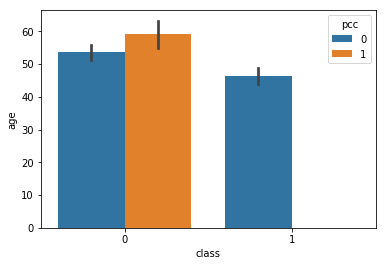

In [150]:
sns.barplot(x='class',y='age',data=df1_clean,hue='pcc')

54.54132231404958

46.37424320645797